https://bit.ly/FEML-10-ensemble

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

In [2]:
!wget 'https://drive.google.com/uc?id=1UyGD0iuIsO0Q7mBn8YY6lSuCc8r5MGzH' -O train.csv

--2023-04-21 17:04:34--  https://drive.google.com/uc?id=1UyGD0iuIsO0Q7mBn8YY6lSuCc8r5MGzH
Resolving drive.google.com (drive.google.com)... 173.194.205.138, 173.194.205.113, 173.194.205.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.205.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/02lvnojqhr3hj094bndlb4vtqcccb50r/1682085825000/02611596255248067438/*/1UyGD0iuIsO0Q7mBn8YY6lSuCc8r5MGzH?uuid=f4691e86-11ac-4fc8-bbdf-41a521614c97 [following]
--2023-04-21 17:04:36--  https://doc-0o-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/02lvnojqhr3hj094bndlb4vtqcccb50r/1682085825000/02611596255248067438/*/1UyGD0iuIsO0Q7mBn8YY6lSuCc8r5MGzH?uuid=f4691e86-11ac-4fc8-bbdf-41a521614c97
Resolving doc-0o-84-docs.googleusercontent.com (doc-0o-84-docs.googleusercontent.com)... 172.217.17.129
Connecting to doc-0o-84-docs.googleuserc

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Разделяем на тренировочные и тестовые данные

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='SalePrice'),
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=42)
X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [6]:
# Находим категориальные признаки

categorials = X_train.select_dtypes('object').columns
categorials

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
# закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
X_train[categorials] = X_train[categorials].fillna('nan')
X_test[categorials] = X_test[categorials].fillna('nan')

In [8]:
# отфильтруем непрерывные признаки
integer = X_train.select_dtypes(['int', 'float']).columns.tolist()
integer.remove('Id')
X_train[integer].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
135,20,80.0,10400,7,6,1970,1970,288.0,0,0,...,530,98,0,0,0,0,0,0,5,2008
1452,180,35.0,3675,5,5,2005,2005,80.0,547,0,...,525,0,28,0,0,0,0,0,5,2006
762,60,72.0,8640,7,5,2009,2009,0.0,24,0,...,614,169,45,0,0,0,0,0,6,2010
932,20,84.0,11670,9,5,2006,2006,302.0,0,0,...,788,0,191,0,0,0,0,0,3,2007
435,60,43.0,10667,7,6,1996,1996,0.0,385,344,...,550,158,61,0,0,0,0,0,4,2009


In [9]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(X_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(X_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))   # set intersection


dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([X_train[integer].fillna(-999), dummy_train], axis=1)

X_test = pd.concat([X_test[integer].fillna(-999), dummy_test], axis=1)

In [10]:
dummy_train.shape, dummy_test.shape, len(dummy_cols)

((1022, 233), (438, 233), 233)

In [11]:
X_train.shape, X_test.shape

((1022, 269), (438, 269))

In [12]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_RFn,Neighborhood_IDOTRR,MasVnrType_None,CentralAir_Y,BsmtExposure_No,HouseStyle_1.5Unf,Neighborhood_Edwards,GarageCond_Fa,GarageFinish_Fin,FireplaceQu_Fa
135,20,80.0,10400,7,6,1970,1970,288.0,0,0,...,0,0,0,1,1,0,0,0,0,0
1452,180,35.0,3675,5,5,2005,2005,80.0,547,0,...,0,0,0,1,0,0,1,0,1,0
762,60,72.0,8640,7,5,2009,2009,0.0,24,0,...,0,0,1,1,0,0,0,0,0,0
932,20,84.0,11670,9,5,2006,2006,302.0,0,0,...,0,0,0,1,1,0,0,0,1,0
435,60,43.0,10667,7,6,1996,1996,0.0,385,344,...,1,0,1,1,0,0,0,0,0,0


## Бэггинг

In [13]:
results ={}

In [14]:
from sklearn.ensemble import  BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [15]:
dt = DecisionTreeRegressor(random_state=10)
dt.fit(X_train, y_train)
results['DecisionTreeRegressor'] =  dt.score(X_train, y_train), dt.score(X_test, y_test)

In [16]:
results

{'DecisionTreeRegressor': (1.0, 0.7556540509485441)}

In [17]:
dt.tree_.max_depth, dt.tree_.node_count, X_train.shape # the tree is overfitted

(20, 1955, (1022, 269))

In [18]:
bagging = BaggingRegressor(DecisionTreeRegressor(),
                           n_estimators=10, # количество деревьев
                           max_samples=0.5, # доля объектов для обучения каждого дерева
                           max_features=0.5,# доля признаков для обучения каждого дерева
                           random_state=10)

In [19]:
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=0.5,
                 max_samples=0.5, random_state=10)

In [20]:
results['BaggingRegressor with DT'] = bagging.score(X_train, y_train), bagging.score(X_test, y_test)

In [21]:
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)

results['KNeighborsRegressor'] = kn.score(X_train, y_train), kn.score(X_test, y_test)

In [22]:
bagging = BaggingRegressor(KNeighborsRegressor(),
                           n_estimators=100,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10)

In [23]:
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(), max_features=0.5,
                 max_samples=0.5, n_estimators=100, random_state=10)

In [24]:
results['BaggingRegressor with KNN'] = bagging.score(X_train, y_train), bagging.score(X_test, y_test)

### RandomForest

In [25]:
# Создаем модель RandomForest
clf_rf = RandomForestRegressor(random_state=10)
clf_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [26]:
results['RandomForestRegressor'] = clf_rf.score(X_train, y_train), clf_rf.score(X_test, y_test)

In [27]:
pd.DataFrame.from_dict(results, orient='index', columns=['Train', 'Test']).sort_values(by='Test', ascending=False).style.bar(subset=['Test'], color= 'coral')

,Train,Test
RandomForestRegressor,0.978221,0.895704
BaggingRegressor with DT,0.908956,0.831366
DecisionTreeRegressor,1.000000,0.755654
BaggingRegressor with KNN,0.746539,0.718983
KNeighborsRegressor,0.750185,0.676139


In [28]:
# Выявляем наиболее важные признаки и выводим на график. Большое значение имеет признак Overall Qual, остальные почти равны нулю

imp = pd.Series(clf_rf.feature_importances_)

In [29]:
imp.index = pd.Series(X_train.columns)

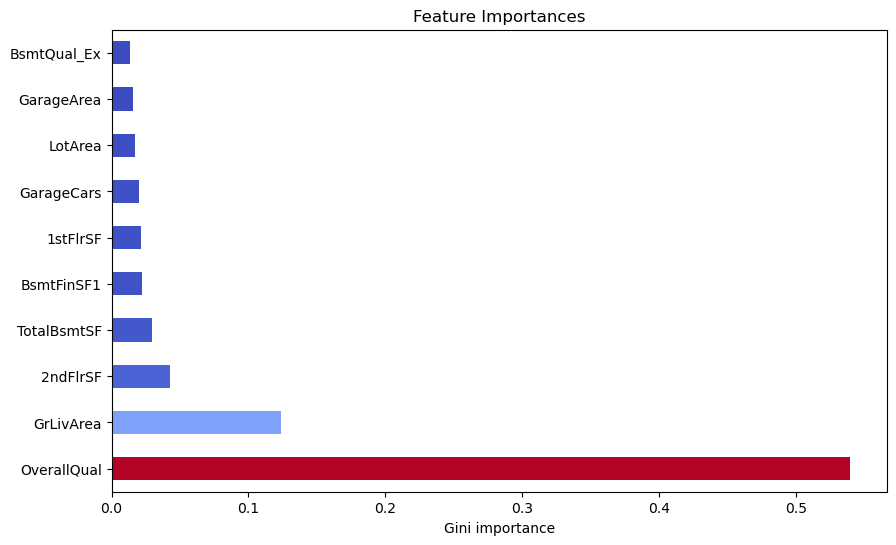

In [30]:
import matplotlib.cm as cm

imp = imp.sort_values(ascending=False)
imp = imp.head(10)

cmap = cm.get_cmap('coolwarm')                   # 
norm = plt.Normalize(imp.min(), imp.max())      # normalize the colors
colors = [cmap(norm(value)) for value in imp]   # map the normalized values to colors

ax = imp.plot(kind='barh', title='Feature Importances', figsize=(10, 6), color= colors)
plt.xlabel('Gini importance');

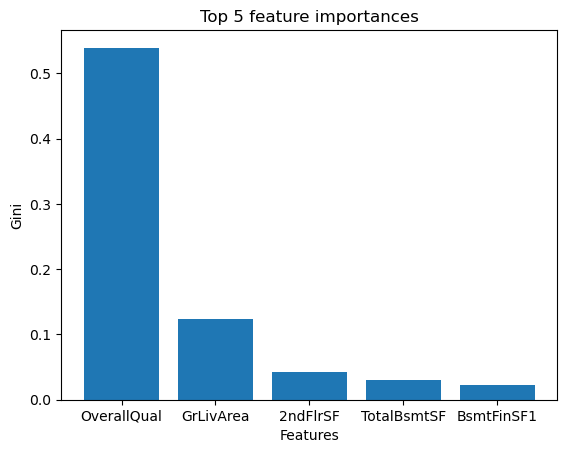

In [31]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.show()

## Стекинг

In [32]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

In [33]:
# Создаем стэккинг и обучаем его на наших данных 

Regressor = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('DecisionTree', DecisionTreeRegressor())
    ], RidgeCV())

In [34]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighborsRegressor', KNeighborsRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [35]:
results['StackingRegressor'] = Regressor.score(X_train, y_train), Regressor.score(X_test, y_test)

In [36]:
print(f'Score on train  {Regressor.score(X_train, y_train)}')
print(f'Score on test  {Regressor.score(X_test, y_test)}')

Score on train  0.9569742758560256
Score on test  0.8618890311559873


In [37]:
for i in Regressor.named_estimators:
    print(f'Score on train  with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')

Score on train  with model LinearRegression 0.9324813510011759
Score on test  with model LinearRegression 0.8089579218167005
Score on train  with model KNeighborsRegressor 0.750184842189582
Score on test  with model KNeighborsRegressor 0.676138613361793
Score on train  with model DecisionTree 1.0
Score on test  with model DecisionTree 0.768240297489187


Лучше всех справилась Линейная регрессия.
Деревья решений, как и предполагалось, переобучилась. Алгоритм ближайшего соседа тоже не плохо справилась с задачей. 

## Бустинг

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

boosting = GradientBoostingRegressor(n_estimators=100,
                                     random_state=10)

In [39]:
boosting.fit(X_train, y_train)

GradientBoostingRegressor(random_state=10)

In [40]:
results['StackingRegressor'] = Regressor.score(X_train, y_train), Regressor.score(X_test, y_test)

In [41]:
boosting.score(X_train, y_train)

0.9715180667981475

In [42]:
boosting.score(X_test, y_test)

0.914321550864855

### lightgbm

In [43]:
try:
  from lightgbm import LGBMRegressor
except:
  !pip install lightgbm
  from lightgbm import LGBMRegressor

In [44]:
lgbm = LGBMRegressor(random_state=10)

In [45]:
# lgbm.fit(X_train, y_train)

In [58]:
results['LGBMRegressor'] = 0,0        #lgbm.score(X_train, y_train), lgbm.score(X_test, y_test)

### xgboost (eXtreme Gradient Boosting)

In [59]:
try:
  from xgboost import XGBRegressor
except:
  !pip install xgboost
  from xgboost import XGBRegressor

In [60]:
xgb = XGBRegressor(random_state=10)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=10, ...)

In [61]:
results['XGBRegressor'] = xgb.score(X_train, y_train), xgb.score(X_test, y_test)

In [62]:
xgb.score(X_train, y_train)

0.9998573389871543

In [63]:
xgb.score(X_test, y_test)

0.8964189757251795

### catboost

In [64]:
try:
  from catboost import CatBoostRegressor
except:
  !pip install catboost
  from catboost import CatBoostRegressor

In [65]:
cat = CatBoostRegressor(random_state=10, verbose=0)
cat.fit(X_train, y_train)

In [66]:
results['CatBoostRegressor'] = cat.score(X_train, y_train), cat.score(X_test, y_test)

In [69]:
pd.DataFrame.from_dict(results, orient='index', columns=['Train', 'Test']).sort_values(by='Test', ascending=False).style.bar(subset=['Test'], color= 'coral')

,Train,Test
CatBoostRegressor,0.995795,0.918053
XGBRegressor,0.999857,0.896419
RandomForestRegressor,0.978221,0.895704
StackingRegressor,0.956974,0.861889
BaggingRegressor with DT,0.908956,0.831366
DecisionTreeRegressor,1.000000,0.755654
BaggingRegressor with KNN,0.746539,0.718983
KNeighborsRegressor,0.750185,0.676139
LGBMRegressor,0.000000,0.000000


# Дополнительные материалы:
1. Ансамбли в машинном обучении - https://dyakonov.org/2019/04/19/%D0%B0%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8-%D0%B2-%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC-%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8/
2. Ансамблевые методы: бэггинг, бустинг и стекинг - https://neurohive.io/ru/osnovy-data-science/ansamblevye-metody-begging-busting-i-steking/
3. Бэггинг и бутстрап + композиции в целом - https://habr.com/ru/company/ods/blog/324402/
4. Бэггинг и случайный лес - https://youtu.be/rawnIo_XtYY
5. Бустинг - https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d
6. CatBoost против Light GBM против XGBoost - https://machinelearningmastery.ru/catboost-vs-light-gbm-vs-xgboost-5f93620723db/
